**RMSD Analyis of MD Simulations**

In this notebook, we will perform Root Mean Square Deviation (RMSD) analysis of LAT1's backbone Cα atoms and cholesterol bound to the CHOL3 binding site. For access to the MD files used in this notebook, please refer to Zenodo (linked in the README file).

RMSD is a useful method to estimate how much a structure changes over time. By calculating the RMSD for every frame during the simulation, we can get a holistic view of what is happening during the simulation. It is also a quick method to understand how different entities in the system are moving relative to each other—in this case, the LAT1 protein and a cholesterol molecule.

This notebook compares the RMSD for the four replicate systems at the 'CHOL3', cholesterol binding site.

**1. Import Libraries**

In [1]:
# Install the following libraries if you haven't already
import MDAnalysis as mda
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

**2. Load the MD Systems**

In [2]:
# Load the trajectory and topology files for four replicate systems
u31 = mda.Universe('../Files/CHOL3/clr3_md1.pdb', '../Files/CHOL3/clr3_md1.xtc')
u32 = mda.Universe('../Files/CHOL3/clr3_md2.pdb', '../Files/CHOL3/clr3_md2.xtc')
u33 = mda.Universe('../Files/CHOL3/clr3_md3.pdb', '../Files/CHOL3/clr3_md3.xtc')
u34 = mda.Universe('../Files/CHOL3/clr3_md4.pdb', '../Files/CHOL3/clr3_md4.xtc')

**3. Define Cholesterol Atoms, Run RMSD and visualize results**

First let's focus on one sytem first(replicate 1). Let's see how the RMSD of LAT1's backbone Cα atoms and cholesterol molecules align

In [3]:
# Define cholesterol molecule selection
clr = 'resid 481' 

# Calculate RMSD for the backbone and cholesterol in Replicate 1
R11 = rms.RMSD(u31, u31, select='backbone', groupselections=[clr], ref_frame=0)
R11.run(verbose=True)

# Organize RMSD results into a Dataframe
df11 = pd.DataFrame(R11.results.rmsd, columns=['Frame', 'Time (ps)', 'Backbone_1', 'CHOL3_1'])
df11['Time (ns)'] = df11['Time (ps)'] * 0.001  # Convert to nanoseconds

  0%|          | 0/2000 [00:00<?, ?it/s]

In [4]:
df11.head(3)  # Preview data as a quality check

,Frame,Time (ps),Backbone_1,CHOL3_1,Time (ns)
0,0.0,100.0,0.000001,0.000000,0.1
1,1.0,200.0,0.789391,2.907219,0.2
2,2.0,300.0,0.849126,2.868000,0.3


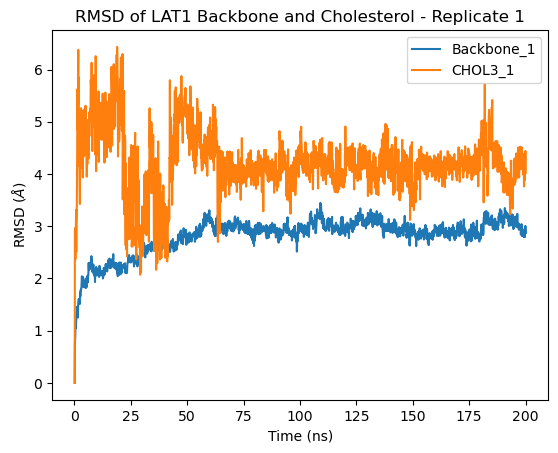

In [5]:
# Plot RMSD for LAT1 and cholesterol in Replicate 1
ax = df11.plot(x='Time (ns)', y=['Backbone_1', 'CHOL3_1'], kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')
ax.set_title('RMSD of LAT1 Backbone and Cholesterol - Replicate 1')
plt.show()

**While this is great, it is also useful to visualize only the variation of LAT1 alpha carbons or cholesterol, for each replicate**

First, let's create a simple funtion to calculate RMSD and organize into a dataframe

In [6]:
# Function to calculate RMSD for a system and return a Dataframe
def calculate_rmsd(universe, label, ref_frame=0):
    """Calculates the RMSD of backbone and cholesterol and returns a DataFrame."""
    rmsd_analysis = rms.RMSD(universe, universe, select='backbone', groupselections=[clr], ref_frame=ref_frame)
    rmsd_analysis.run(verbose=True)
    
    # Organize RMSD results into a Dataframe
    df = pd.DataFrame(rmsd_analysis.results.rmsd, columns=['Frame', 'Time (ps)', f'Backbone_{label}', f'CHOL3_{label}'])
    df['Time (ns)'] = df['Time (ps)'] * 0.001  # Convert to nanoseconds
    return df

Next, we can loop through each replicate system to calculate RMSD values.

In [7]:
# List of Universe objects and their labels
universes = [u31, u32, u33, u34]
labels = [1, 2, 3, 4]

# Dictionary to store the Dataframes
rmsd_dfs = {}

# Loop over universes and calculate RMSD for each system
for i, universe in enumerate(universes):
    label = labels[i]
    rmsd_dfs[f'df{label}'] = calculate_rmsd(universe, label)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2001 [00:00<?, ?it/s]

  0%|          | 0/2001 [00:00<?, ?it/s]

  0%|          | 0/2001 [00:00<?, ?it/s]

Next, this function allows for visualizing the backbone RMSD and cholesterol across all replicates

In [8]:
def plot_backbone_rmsd(rmsd_dfs, labels):
    plt.figure(figsize=(10, 6))
    
    for label in labels:
        df = rmsd_dfs[f'df{label}']
        plt.plot(df['Time (ns)'], df[f'Backbone_{label}'], label=f'Backbone_{label}')
    
    plt.ylabel(r'RMSD ($\AA$)')
    plt.title('RMSD of LAT1 Backbone Across Replicate Systems')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def plot_cholesterol_rmsd(rmsd_dfs, labels):
    plt.figure(figsize=(10, 6))
    
    for label in labels:
        df = rmsd_dfs[f'df{label}']
        plt.plot(df['Time (ns)'], df[f'CHOL3_{label}'], label=f'Cholesterol_{label}')
    
    plt.ylabel(r'RMSD ($\AA$)')
    plt.title('RMSD of Cholesterol Across Replicate Systems')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

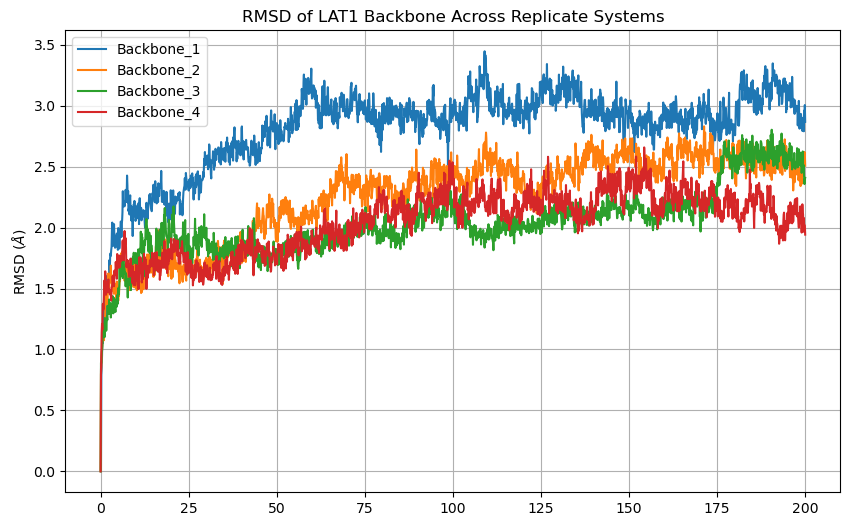

In [9]:
# Plot Backbone RMSD for all replicates
plot_backbone_rmsd(rmsd_dfs, labels)

Now repeat to view the cholesterol RMSD for each system

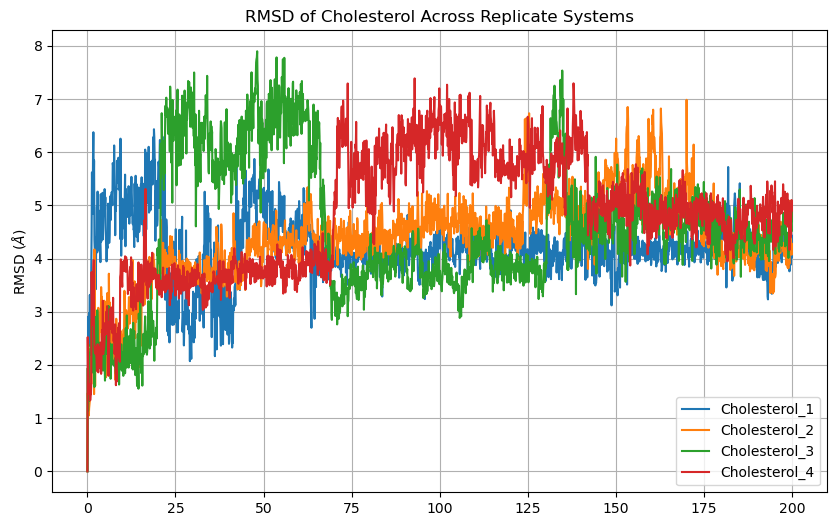

In [10]:
# Plot Cholesterol RMSD for all replicates
plot_cholesterol_rmsd(rmsd_dfs, labels)